In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
import numpy as np
from scipy.stats import shapiro, levene

In [38]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data (2).csv


In [39]:
df = pd.read_csv("INF2178_A3_data.csv")
df.isna().sum()

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [40]:
print(df.dtypes)
df['incomegroup'] = df['incomegroup'].astype('category')

fallreadingscore               float64
fallmathscore                  float64
fallgeneralknowledgescore      float64
springreadingscore             float64
springmathscore                float64
springgeneralknowledgescore    float64
totalhouseholdincome           float64
incomeinthousands              float64
incomegroup                      int64
dtype: object


In [41]:
print(df.dtypes)

fallreadingscore                float64
fallmathscore                   float64
fallgeneralknowledgescore       float64
springreadingscore              float64
springmathscore                 float64
springgeneralknowledgescore     float64
totalhouseholdincome            float64
incomeinthousands               float64
incomegroup                    category
dtype: object


In [42]:
# data clearning
df = df.drop('incomeinthousands', axis=1)

**EDA**

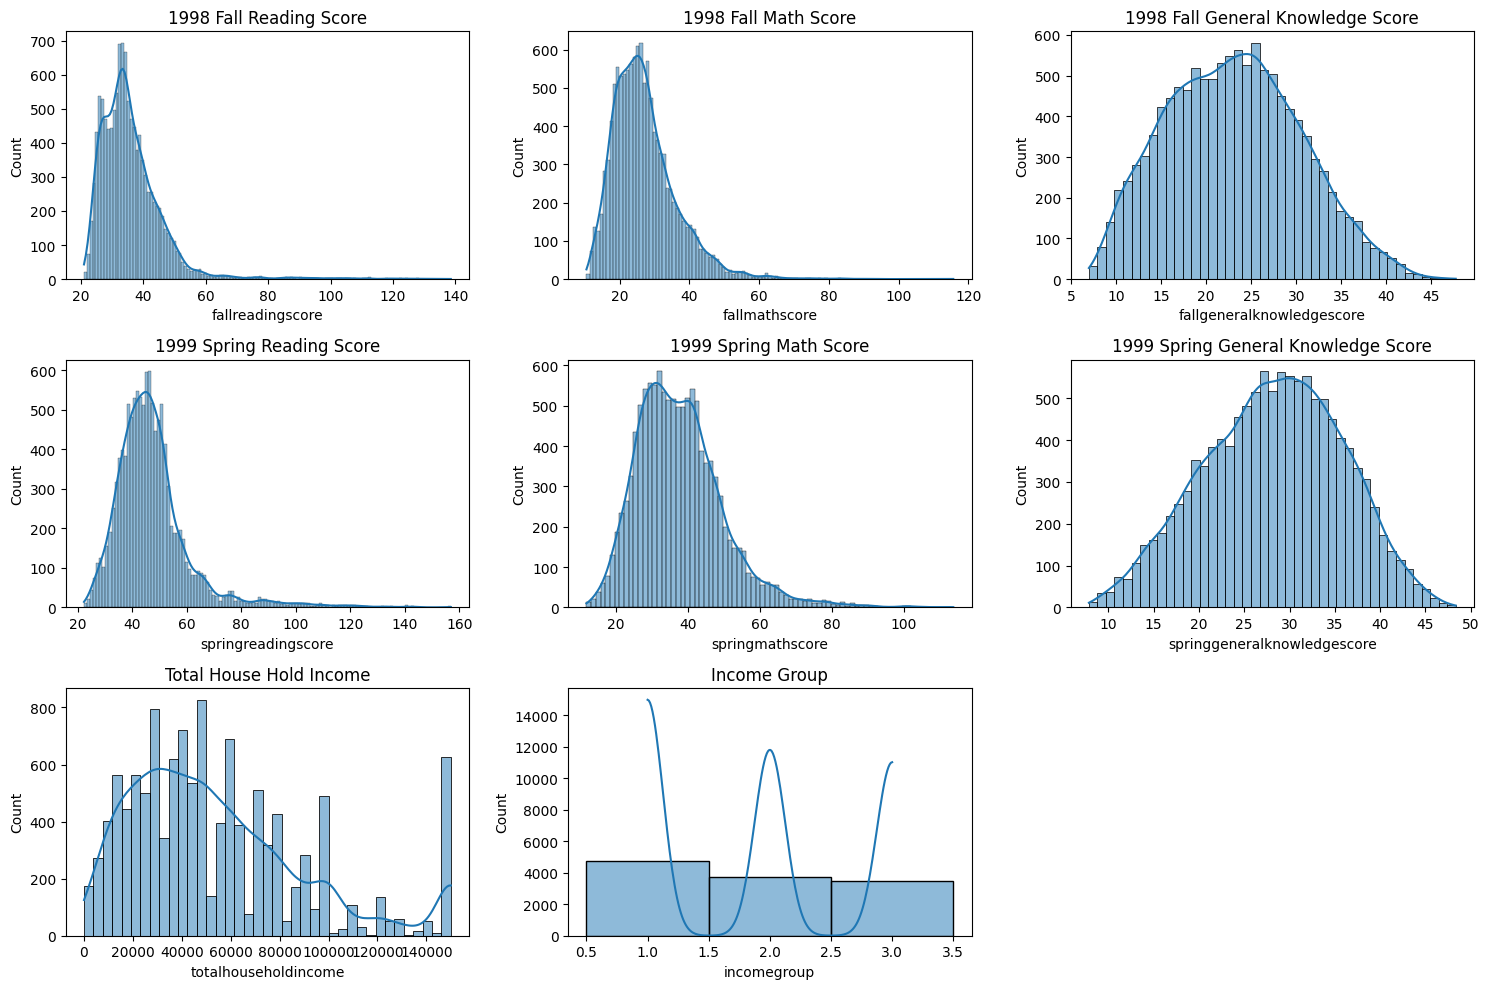

In [43]:
# EDA
plt.figure(figsize=(15, 10))
title_mapping = {
    'fallreadingscore': '1998 Fall Reading Score',
    'fallmathscore': '1998 Fall Math Score',
    'fallgeneralknowledgescore': '1998 Fall General Knowledge Score',
    'springreadingscore': '1999 Spring Reading Score',
    'springmathscore': '1999 Spring Math Score',
    'springgeneralknowledgescore': '1999 Spring General Knowledge Score',
    'totalhouseholdincome': 'Total House Hold Income',
    'incomegroup': 'Income Group'
}

for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(title_mapping[column])
plt.tight_layout()
plt.show()

**ANCOVA**

In [44]:
# preparing data for ANCOVA
# compute the change in reading,math and general knowledge scores from fall to spring
df['reading_score_change'] = df['springreadingscore'] - df['fallreadingscore']
df['math_score_change'] = df['springmathscore'] - df['fallmathscore']
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomegroup,reading_score_change,math_score_change
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,3,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,3,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,3,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,2,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,2,0.86,3.95


In [46]:
# ols model fitting for reading and math
model_reading = ols('reading_score_change ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
model_math = ols('math_score_change ~ incomegroup + fallgeneralknowledgescore', data=df).fit()

In [47]:
# reading score ols regression result
print(model_reading.summary())

                             OLS Regression Results                             
Dep. Variable:     reading_score_change   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     95.49
Date:                  Fri, 22 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                          19:14:29   Log-Likelihood:                -41730.
No. Observations:                 11933   AIC:                         8.347e+04
Df Residuals:                     11929   BIC:                         8.350e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [48]:
# math score ols regression result
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:      math_score_change   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        19:14:30   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Model Fitness Test**

In [49]:
# shapiro wilk test for reading scores
w, pvalue = stats.shapiro(model_reading.resid)
print(w,pvalue)

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
# shapiro wilk test for math scores
w, pvalue = stats.shapiro(model_math.resid)
print(w,pvalue)

0.9664044380187988 0.0


In [51]:
# levene test for reading scores
levene_reading = levene(df['springreadingscore'][df['incomegroup'] == 1],
                        df['springreadingscore'][df['incomegroup'] == 2],
                        df['springreadingscore'][df['incomegroup'] == 3])
levene_reading

LeveneResult(statistic=39.5528295964788, pvalue=7.570499656193536e-18)

In [52]:
# levene test for math scores
levene_math = levene(df['springmathscore'][df['incomegroup'] == 1],
                     df['springmathscore'][df['incomegroup'] == 2],
                     df['springmathscore'][df['incomegroup'] == 3])
levene_math

LeveneResult(statistic=18.899850238111785, pvalue=6.380804527269148e-09)

**Visualization**

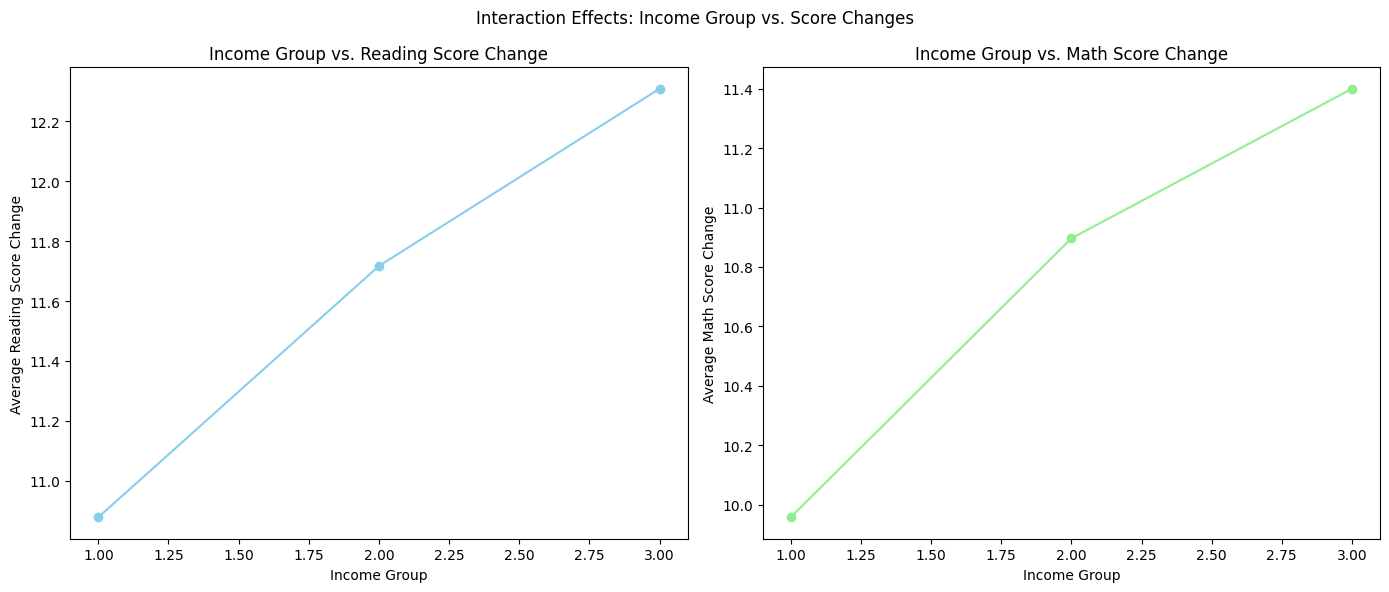

In [45]:
# visualizing the relationship between score changes and income
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Interaction Effects: Income Group vs. Score Changes')

# calculate means for interaction plots
reading_change_means = df.groupby('incomegroup')['reading_score_change'].mean()
math_change_means = df.groupby('incomegroup')['math_score_change'].mean()

# interaction plot for reading score change
axes[0].plot(reading_change_means.index, reading_change_means.values, marker='o', linestyle='-', color='skyblue')
axes[0].set_title('Income Group vs. Reading Score Change')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Average Reading Score Change')

# interaction plot for math score change
axes[1].plot(math_change_means.index, math_change_means.values, marker='o', linestyle='-', color='lightgreen')
axes[1].set_title('Income Group vs. Math Score Change')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Average Math Score Change')

plt.tight_layout()
plt.show()
